In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Read the dataset
data = pd.read_csv('state_car.csv')

In [3]:
# EDA
# Display the first few rows of the dataset
print("First few rows of the dataset:\n", data.head())

First few rows of the dataset:
                state    capital  subsidy  road tax  petrol  diesel
0     Andhra Pradesh  Amaravati      0.0       1.0  111.65   99.41
1  Arunachal Pradesh   Itanagar   5000.0       0.0   95.89   84.81
2              Assam     Dispur  10000.0       1.0   96.34   84.24
3              Bihar      Patna  10000.0       1.0  109.17   95.82
4       Chhattisgarh     Raipur   5000.0       0.0  102.98   95.96


In [4]:
# Summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
             subsidy   road tax      petrol     diesel
count     36.000000  36.000000   36.000000  36.000000
mean    3250.000000   0.492778  100.876667  90.516389
std     3682.972402   0.486994    6.266918   5.378121
min        0.000000   0.000000   84.100000  79.740000
25%        0.000000   0.000000   96.245000  86.500000
50%     2000.000000   0.500000   99.335000  90.225000
75%     5000.000000   1.000000  106.535000  95.265000
max    10000.000000   1.000000  111.970000  99.970000


In [5]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 state       0
capital     0
subsidy     0
road tax    0
petrol      0
diesel      0
dtype: int64


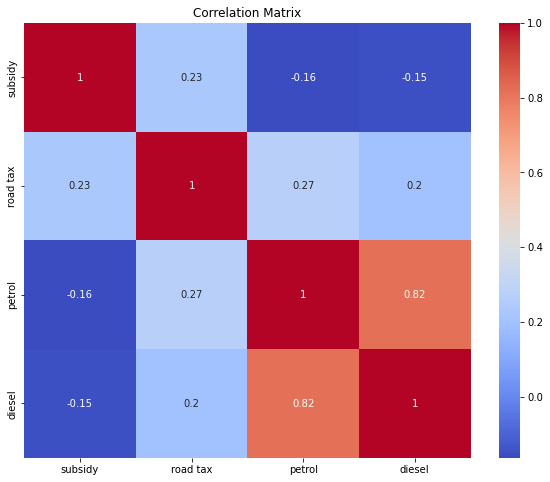

In [6]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

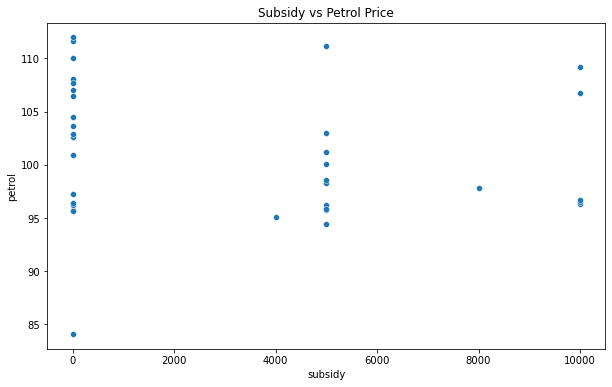

In [7]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='subsidy', y='petrol')
plt.title("Subsidy vs Petrol Price")
plt.show()

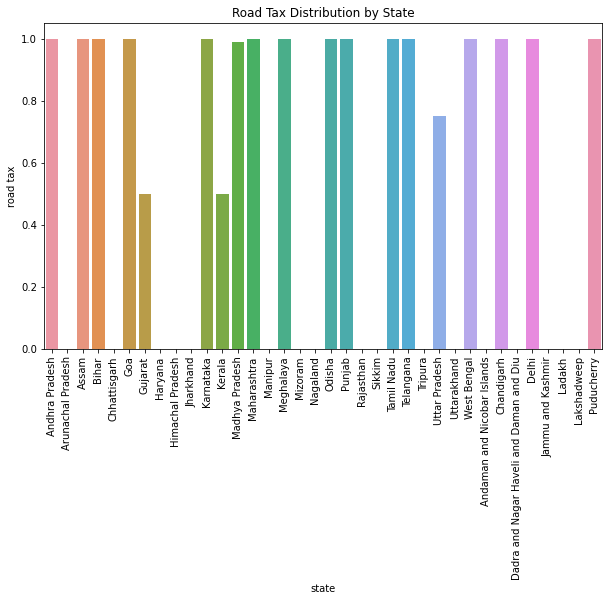

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='state', y='road tax')
plt.title("Road Tax Distribution by State")
plt.xticks(rotation=90)
plt.show()

In [9]:
# Segmentation analysis using K-means clustering
segmentation_variables = ['subsidy', 'road tax', 'petrol', 'diesel']

In [10]:
# Perform segmentation analysis
segmented_data = data.groupby(['state'])[segmentation_variables].mean()

In [11]:
# let's consider the states with higher subsidies as one potential target segment.
target_segment = segmented_data[segmented_data['subsidy'] > segmented_data['subsidy'].mean()]

# Print the target segment
print("Target Segment (States with Higher Subsidies):\n", target_segment)

Target Segment (States with Higher Subsidies):
                                           subsidy  road tax  petrol  diesel
state                                                                      
Arunachal Pradesh                          5000.0       0.0   95.89   84.81
Assam                                     10000.0       1.0   96.34   84.24
Bihar                                     10000.0       1.0  109.17   95.82
Chandigarh                                 5000.0       1.0   96.20   84.26
Chhattisgarh                               5000.0       0.0  102.98   95.96
Dadra and Nagar Haveli and Daman and Diu   5000.0       0.0   94.43   89.98
Delhi                                     10000.0       1.0   96.72   89.62
Goa                                        8000.0       1.0   97.82   90.37
Gujarat                                   10000.0       0.5   96.49   92.23
Himachal Pradesh                           5000.0       0.0   95.74   81.99
Jharkhand                               

In [12]:
# Select the relevant features for clustering
X = data[segmentation_variables]

In [13]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\91810\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


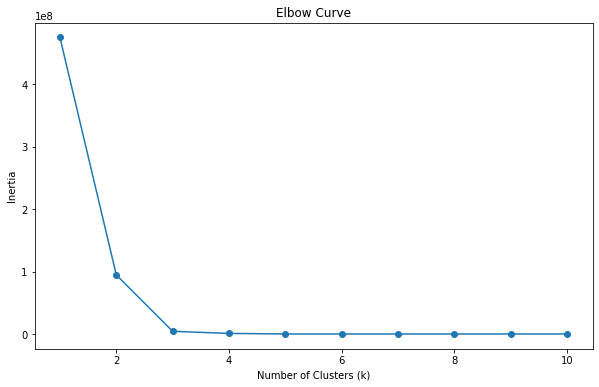

In [14]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [15]:
# Choose the optimal number of clusters based on the Elbow curve
k = 3

In [16]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [17]:
# Add the cluster labels to the dataset
data['cluster'] = kmeans.labels_

In [18]:
# Analyze the segments
segmented_data = data.groupby('cluster').mean()
print("Segmented Data:\n", segmented_data)

Segmented Data:
              subsidy  road tax      petrol     diesel
cluster                                              
0           0.000000  0.457778  102.372222  91.921111
1        4916.666667  0.333333   98.794167  88.188333
2        9666.666667  0.916667  100.555000  90.958333


In [19]:
# Assign states to clusters
state_clusters = data[['state', 'cluster']]
print("State-Cluster Assignment:\n", state_clusters)

State-Cluster Assignment:
                                        state  cluster
0                             Andhra Pradesh        0
1                          Arunachal Pradesh        1
2                                      Assam        2
3                                      Bihar        2
4                               Chhattisgarh        1
5                                        Goa        2
6                                    Gujarat        2
7                                    Haryana        0
8                           Himachal Pradesh        1
9                                  Jharkhand        1
10                                 Karnataka        0
11                                    Kerala        0
12                            Madhya Pradesh        0
13                               Maharashtra        1
14                                   Manipur        1
15                                 Meghalaya        1
16                                   Mizoram        0
1

### CONCLUSION:

Based on the segmented data, we can analyze the clusters as follows:

Cluster 0:

- This cluster has a subsidy close to zero, indicating that the states in this cluster have minimal or no subsidies for electric vehicles.
- The road tax is relatively high compared to other clusters.
- The average petrol price is around 102.37, and the average diesel price is around 91.92.

Cluster 1:

- This cluster has a moderate subsidy of approximately 4916.67.
- The road tax is relatively low compared to other clusters.
- The average petrol price is around 98.79, and the average diesel price is around 88.19.

Cluster 2:

- This cluster has the highest subsidy, averaging around 9666.67.
- The road tax is moderately high.
- The average petrol price is around 100.55, and the average diesel price is around 90.96.

Based on this analysis, we can observe that Cluster 2 has the highest subsidy, which indicates that the states in this cluster may be more favorable for electric vehicle adoption due to the incentives provided. Cluster 1 also shows some potential, although the subsidy is lower than in Cluster 2. Cluster 0 has the least favorable conditions for electric vehicles, with minimal subsidies and higher road taxes.

Considering these findings, your team could focus on targeting the states in Cluster 2 and Cluster 1 for market entry, as they appear to have a more conducive environment for electric vehicle adoption based on the available dataset. However, it's important to conduct further research and analysis to validate these findings and consider additional factors that may impact the market entry strategy, such as infrastructure readiness, consumer preferences, and government policies.
